<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%A2%D1%80%D0%B0%D0%BD%D1%81%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%86%D0%B8%D0%B8_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align: center;">Трансформации изображений</b></h1>

В этом уроке научимся трансформировать изображения.




In [1]:
# import the necessary packages
# импортируем необходимые модули
import cv2
from google.colab.patches import cv2_imshow

Загрузка файлов

In [2]:
!wget http://dataudt.ru/datasets/cv/Lesson_13.Transformations.zip
!unzip Lesson_13.Transformations.zip
%cd /content/Lesson_13.Transformations

--2022-01-27 17:23:04--  http://dataudt.ru/datasets/cv/Lesson_13.Transformations.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19297 (19K) [application/zip]
Saving to: ‘Lesson_13.Transformations.zip’

Lesson_13.Transform 100%[===================>]  18.84K  --.-KB/s    in 0.04s   

2022-01-27 17:23:04 (470 KB/s) - ‘Lesson_13.Transformations.zip’ saved [19297/19297]

Archive:  Lesson_13.Transformations.zip
  inflating: Lesson_13.Transformations/Computer_vision.png  
  inflating: Lesson_13.Transformations/Computer_vision_noise.png  
  inflating: Lesson_13.Transformations/Transformations.py  
/content/Lesson_13.Transformations


In [12]:
# construct the argument parser and parse the arguments
# создадим парсер и укажем аргументы
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, help="Path to the image")
# args = vars(ap.parse_args())
# пока мы используем Jupyter Notebooks мы можем заменить наш парсер
# явными аргументами и значениями
#args = {
#	"image": "/content/Lesson_13.Transformations/Computer_vision.png",

#}
# раскомментируйте для зашумленного изображения
args = {
 	"image": "/content/Lesson_13.Transformations/Computer_vision_noise.png",

 }

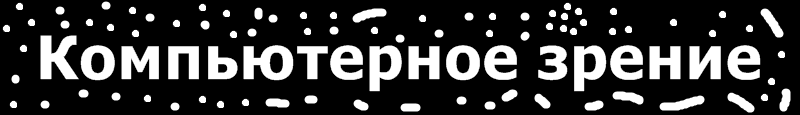

Original


In [13]:
# load the image and convert it to grayscale
# загружаем изображение и конвертируем его в оттенки серого
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image)
print('Original')

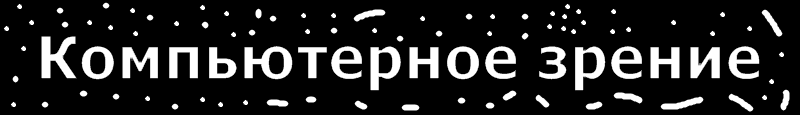

Eroded 1 times


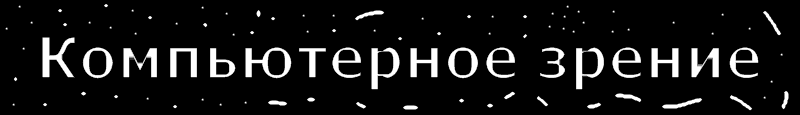

Eroded 2 times


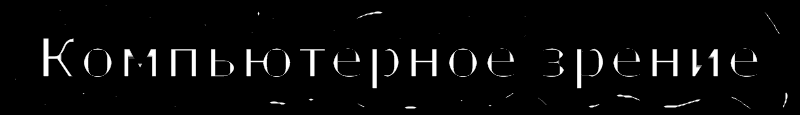

Eroded 3 times


In [14]:
# apply a series of erosions
# наносим серию эрозий
for i in range(0, 3):
	eroded = cv2.erode(gray.copy(), None, iterations=i + 1)
	cv2_imshow(eroded)
	print("Eroded {} times".format(i + 1))

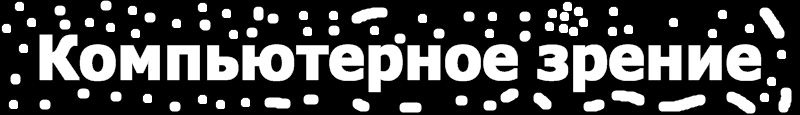

Dilated 1 times


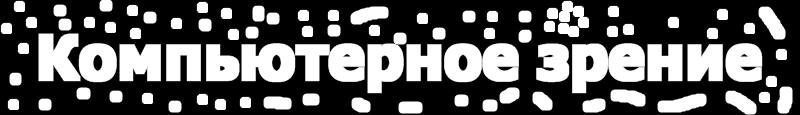

Dilated 2 times


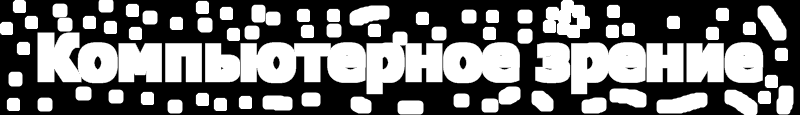

Dilated 3 times


In [15]:
# apply a series of dilations
# применяем серию расширений
for i in range(0, 3):
	dilated = cv2.dilate(gray.copy(), None, iterations=i + 1)
	cv2_imshow(dilated)
	print("Dilated {} times".format(i + 1))

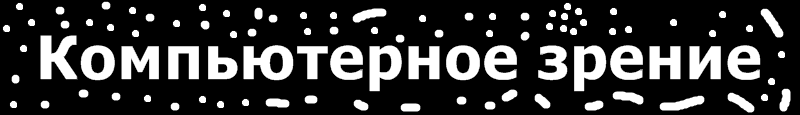

Opening: (3, 3)


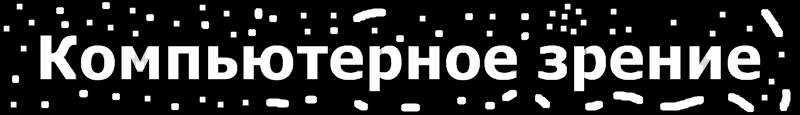

Opening: (5, 5)


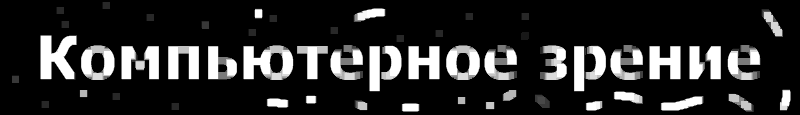

Opening: (7, 7)


In [16]:
kernelSizes = [(3, 3), (5, 5), (7, 7)]

# loop over the kernels and apply an "opening" operation to the image
# перебираем ядра и применяем к изображению операцию "открытия"
for kernelSize in kernelSizes:
	kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
	opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
	cv2_imshow(opening)
	print("Opening: ({}, {})".format(kernelSize[0], kernelSize[1]))


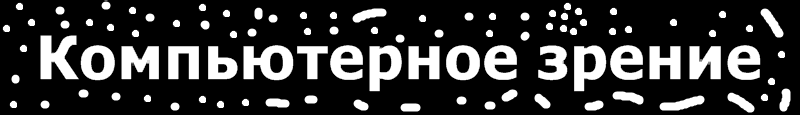

Closing: (3, 3)


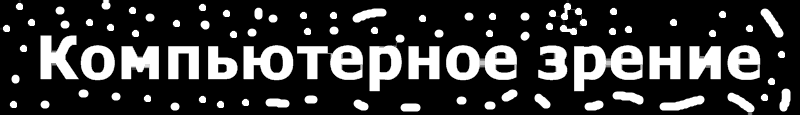

Closing: (5, 5)


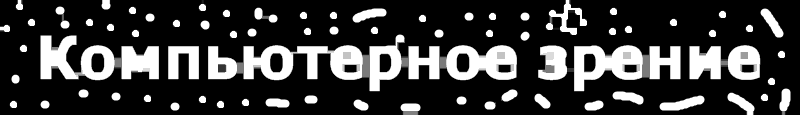

Closing: (7, 7)


In [17]:
# loop over the kernels and apply a "closing" operation to the image
# перебираем ядра и применяем к изображению операцию "закрытия"
for kernelSize in kernelSizes:
	kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
	closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
	cv2_imshow(closing)
	print("Closing: ({}, {})".format(kernelSize[0], kernelSize[1]))


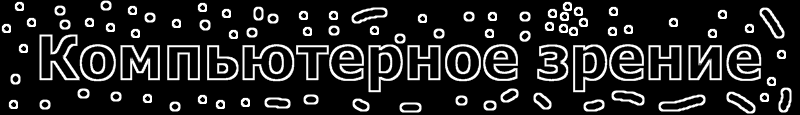

Gradient: (3, 3)


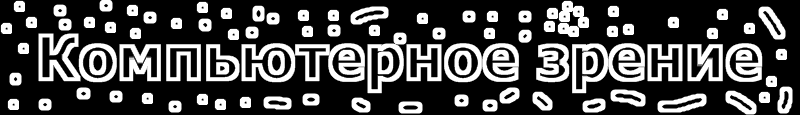

Gradient: (5, 5)


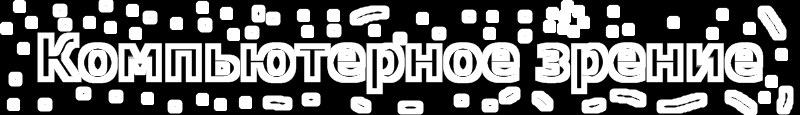

Gradient: (7, 7)


In [18]:
# loop over the kernels and apply a "morphological gradient" operation
# to the image
# перебираем ядра и применяем к изображению 
# операцию "морфологического градиента"
for kernelSize in kernelSizes:
	kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
	gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)
	cv2_imshow(gradient)
	print("Gradient: ({}, {})".format(kernelSize[0], kernelSize[1]))
